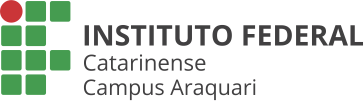

**Alunas:** Maria Fernanda Caetano e Polyana Albanaz da Silva

**Disciplina:** Estrutura de Dados II

**Professor:** Marco Antonio Torrez Rojas


## Implementação do Grafo

#### Classes (Processamento de Dados)

In [ ]:
!pip install networkx

importanto bibliotecas para plotagem (posterior) dos grafos

In [ ]:
import networkx as nx

Criando uma classe de estrurua "nó" de um grafo (utilizada pela classe ListaEncadeada)

In [ ]:
class Nodo():
    def __init__(self, dado, proximo):
      self.dado = dado # representa a informação do grafo
      self.prox = proximo # aponta para o próximo nó relacionado na lista encadeada

Criando uma classe de estrutura de Lista Encadeada (utilizada na classe Grafo)

In [ ]:
class ListaEncadeada():
    def __init__(self):
        self.head = None

    def inserir_inicio(self, listinha, novo_dado):
        # inserindo no início, cria um novo nodo e define-o como a 'cabeça' da estrutura
        novo_nodo = Nodo(novo_dado, self.head) # criar um objeto nó
        listinha.head = novo_nodo # definir novo nó gerado como head da lista

    def inserir_depois(self, lista, nodo_ant, novo_dado):
        # inserindo depois, incluirá um novo nó depois do elemento 'cabeça'
        novo_nodo = Nodo(novo_dado, nodo_ant.prox) # criar um objeto nó
        nodo_ant = self.head # definir o anterior como o head (vai ficar em 'primeiro' na lista)
        nodo_ant.prox = novo_nodo # definir o prox do head como o novo nó gerado

    def imprimir_lista(self, listinha):
      # imprimir uma lista em formato lista encadeada padrão :)
        atual = listinha.head # criar uma variável de controle para a estrutura de repetição
        while atual:
            if isinstance(atual.prox.dado, list): # verifica se o elemento tem formato certo
                print(f"{atual.dado} → [", end="")
                for subitem in atual.prox.dado: # verifica elementos dentro das listas que indicam as arestas, dentro da lista maior
                    print(f"{subitem}", end="")
                    if subitem != atual.prox.dado[-1]:
                        print(", ", end="")
                print("]", end="")
            else:
                print(f"{atual.dado}", end="")
            atual = atual.prox.prox # segue para o próximo vértice (na lista maior, tem [vértice, aresta, vértice, aresta])
            if atual:
                print(" → ", end="")
        print()

    def imprimir_lista_visual(self, listinha):
      # a mesma coisa que a acima, mas imprime em um formato diferente
        print("\033[33mLista de Adjacências (como lista visual)\033[0m")
        atual = listinha.head
        while atual:
            if isinstance(atual.prox.dado, list):  # verifica se o elemento tem o formato certo
                print(f"{atual.dado} → ", end="")
                for subitem in atual.prox.dado: # verifica elementos dentro das listas que indicam as arestas, dentro da lista maior
                    print(f"{subitem}", end="")
                    if subitem != atual.prox.dado[-1]:
                        print(", ", end="")
                print("\n", end="")
            else:
                print(f"{atual.dado}", end="")
            atual = atual.prox.prox  # segue para o próximo vértice (na lista maior, tem [vértice, aresta, vértice, aresta])
        print()

     # não é importante para a contrução da estrutra do projeto, mais foi interessante incluir na implementação :)
    def buscar_nodo(self, listinha, valor):
        print(f"Buscando valor {valor}...")
        corrente = listinha.head
        while corrente and corrente.dado != valor:
            corrente = corrente.prox
        print(f"\033[32mO elemento {valor} foi encontrado na lista.\033[0m") if corrente != None else print(f"\033[31mO elemento {valor} não foi encontrado na lista.\033[0m")

    def remover_nodo(self, listinha, valor):
        assert self.head, "\033[31mImpossível remover valor de lista vazia.\033[0m"
        corrente = self.head

         # Se o nodo a ser removido é a cabeça da lista.
        if self.head.dado == valor:
            self.head = self.head.prox
        else:
            # Encontrar a posição do elemento a ser removido.
            anterior = None
            while corrente and corrente.dado != valor:
                anterior = corrente
                corrente = corrente.prox
            # Se o nodo corrente é o nodo a ser removido
            if corrente:
                anterior.prox = corrente.prox
            else:
                # Se o nodo corrente é a cauda da lista.
                anterior.prox = None

        # Verificar se o valor foi removido ou não
        if not corrente:
            print(f"\033[31mO elemento procurado não existe\033[0m\n\033[1mLista Atual:\033[0m {listinha}")
        else:
            print(f"\033[32mO elemento procurado foi removido\033[0m\n\033[1mLista Atual:\033[0m {listinha}")

    def __str__ (self):
        return (f"[{str(self.head)}]")

Criando uma classe para detemrinar e imprimir uma matriz (utilizada pela classe Grafo)

In [ ]:

class Matriz():
    def __init__(self, vertices, arestas):
        self.vertices = vertices
        self.arestas = arestas

    def matriz_adjacente(self, lista_adjacentezinha):  # criando uma matriz adjacente a partir da lista comum, não da estrutra encadeada
        matriz_adj = [[0] * len(self.vertices) for _ in range(len(self.vertices))]
        for i, v in enumerate(self.vertices):
            for j, u in enumerate(self.vertices):
                if u in lista_adjacentezinha[self.vertices.index(v)*2+1]:  # Verifica se u está na lista de adjacência de v
                    matriz_adj[i][j] = 1

        # imprimir a matriz adjacente gerada
        print("\033[33mMatriz de Adjacências:\033[0m")
        print("  ", end="")
        for v in self.vertices:
            print(f"\033[34m{v}\033[0m ", end="")
        print()
        for i, v in enumerate(self.vertices):
            print(f'\033[34m{v}\033[0m', end=" ")
            for j, u in enumerate(self.vertices):
                print(matriz_adj[i][j], end=" ")
            print()

    def matriz_incidencias(self, grafinho): # criando uma matriz de incidências a partir da lista comum, não da estrutra encadeada
        matriz_incidencia = [[0] * len(self.arestas) for _ in range(len(self.vertices))]
        for i, v in enumerate(self.vertices):
            for j, a in enumerate(self.arestas):
                if v in a:
                    matriz_incidencia[i][j] = 1

        # imprimir a matriz de incidencias gerada
        print("\033[33mMatriz de Incidências:\033[0m")
        print("  ", end="")
        for a in self.arestas:
            print(f"\033[34m{a}\033[0m ", end="")
        print()
        for i, v in enumerate(self.vertices):
            print(f'\033[34m{v}\033[0m', end="  ")
            for j, _ in enumerate(self.arestas):
                print(matriz_incidencia[i][j], end="  ")
            print()

    def matriz_incidencias_orientado(self):
      # criando uma matriz de incidências (para um grafo orientado) a partir da lista comum, não da estrutra encadeada
        matriz_inc_dir = [[0] * len(self.arestas) for _ in range(len(self.vertices))]
        for i, vertice in enumerate(self.vertices):
            for j, aresta in enumerate(self.arestas):
                if vertice == aresta[0]:  # Se o vértice é o ponto de partida da aresta
                    matriz_inc_dir[i][j] = '-1'
                elif vertice == aresta[1]:  # Se o vértice é o ponto de chegada da aresta
                    matriz_inc_dir[i][j] = '+1'
                else:
                    matriz_inc_dir[i][j] = ' 0'


        print("\033[33mMatriz de Incidências:\033[0m")
        print("   ", end="")
        for a in self.arestas:
            print(f"\033[34m{a}\033[0m  ", end="")
        print()
        for i, v in enumerate(self.vertices):
            print(f'\033[34m{v}\033[0m', end="  ")
            for j, _ in enumerate(self.arestas):
                print(matriz_inc_dir[i][j], end="  ")
            print()


Criando a classe grafo (classe principal)

In [ ]:
class Grafo():
  def __init__(self, vertices, arestas):
    self.vertices = vertices
    self.arestas = arestas
    self.lista_adj = None
    self.matriz_adj = None
    self.matriz_inc = None

  # Função para verificar itens repetidos em uma lista
  # Necessário para controle na função encontra_adjacentes
  def tem_itens_repetidos(self, lista):
    return len(lista) != len(set(lista))

  # Função encontra djacentes vai criar uma lista, que será usada
  # para criar um objeto da classe ListaEncadeada
  def encontra_adjacentes(self):
    adjacencias = []
    for v in self.vertices:
        # inclui o vértice na lista maior
        adjacencias.append(v)
        adjacentes = [] # lista de controle para incluir conjunto de arestas na lista maior

        # IMPORTANTE: o sistema de arestas usado nesta implementação é "VérticeVértice".
        # Em outros casos, com nomeclaturas ou sistemas de contrução diferentes, essa função
        # não será necessária.

        for a in self.arestas:
            if v == a[0]:
                adjacentes.append(a[1])
            elif v == a[1]:
                adjacentes.append(a[0])
        # Verifica se há itens repetidos na lista de adjacentes
        if self.tem_itens_repetidos(adjacentes):
            adjacentes = list(set(adjacentes))  # Remove itens duplicados
        adjacencias.append(adjacentes) # Inclui a lista de vértices adjacentes dentro da lista maior
    return adjacencias

  def mostra_adjacencias (self):
    print("\n\033[33mLista de Adjacências (como lista comum)\033[0m")
    print(self.encontra_adjacentes()) # imprime a lista como uma lista comum, ou seja, não estruturada no padrão de classe solicitado

  def cria_lista_encadeada(self):
    self.lista_adj = ListaEncadeada()
    adjacencias = self.encontra_adjacentes()
    # usando o método de inserir elementos da classe ListaEncadeada, inclui os elementos da lista comum dentro da estrutura
    for i in reversed(adjacencias):
        self.lista_adj.inserir_inicio(self.lista_adj, i)

  def mostrar_lista_adj(self):
    print("\033[33mLista de Adjacências (como lista encadeada)\033[0m")
    self.lista_adj.imprimir_lista(self.lista_adj) # chama a função de imprimir dentro da classe ListaEncadeada

  def mostrar_lista_encadeada(self):
        listinha = self.lista_adj
        self.lista_adj = ListaEncadeada()
        self.lista_adj.imprimir_lista_visual(listinha)

  def matriz_adjacente(self):
        lista_adjacentes = self.encontra_adjacentes()
        matriz_adj = Matriz(self.vertices, self.arestas)
        matriz_adj.matriz_adjacente(lista_adjacentes)

  def matriz_incidencias(self):
        lista_incidencias = self.encontra_adjacentes()
        matriz_inc = Matriz(self.vertices, self.arestas)
        matriz_inc.matriz_incidencias(lista_incidencias)

  def matriz_incidencias_orientado(self):
        lista_incidencias = self.encontra_adjacentes()
        matriz_inc = Matriz(self.vertices, self.arestas)
        matriz_inc.matriz_incidencias_orientado()

  def desenhar_grafo(self):
      print("\033[33mRepresentação do Grafo\033[0m\nEste é um grafo não-direcionado")
      grafinho = nx.Graph()
      arestas_adicionadas = set()  # armazena arestas
      for aresta in self.arestas: # Adicionando as arestas
          v1, v2 = aresta[0], aresta[1]
          if (v2, v1) not in arestas_adicionadas: # Verifica se a aresta inversa já foi adicionada
              grafinho.add_edge(v1, v2)
              arestas_adicionadas.add((v1, v2))

      # Desenhando o grafo
      pos = nx.spring_layout(grafinho)  # Define a posição dos nós
      nx.draw(grafinho, pos, with_labels=True, node_color='y', node_size=800, font_size=12, font_weight='bold')

  def desenhar_grafo_direcionado(self):
    print("\033[33mRepresentação do Grafo\033[0m\nEste é um grafo direcionado")
    grafinho = nx.DiGraph() # Criar um objeto grafo direcionado
    grafinho.add_nodes_from(self.vertices) # Adicionar vértices
    grafinho.add_edges_from(self.arestas) # Adicionar arestas

    # Desenhar o grafo
    pos = nx.spring_layout(grafinho)  # Define a posição dos vértices
    nx.draw(grafinho, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=12, font_weight="bold")  # Desenha o grafo
    nx.draw_networkx_edge_labels(grafinho, pos, edge_labels={(u, v): f"{u}{v}" for u, v in grafinho.edges()}, font_color='red')  # Adiciona rótulos nas arestas

#### Usuário escolhe os vértices (Entrada de Dados)

In [ ]:
# # Usuário define os vértices de um grafo
# vertices = []
# elemento = None

# print("\033[33mInserindo Vértices\033[0m")
# print("Digite os vértices do seu grafo. Digite 'fim' quando todos os grafos forem adicinados\n")
# while 1:
#   elemento = input("Vertice: ")
#   # controle para parar a estrutura de repetição
#   if elemento == "fim" or elemento == "FIM":
#     break

#   # controle para não criar grafos sem identificação
#   elif elemento == "":
#     print("\033[31mElementos vazios não podem ser inclusos como vértices do grafo.\nDigite novamente.\033[0m")
#     pass

#   # controle para não haver vértices com mesma identificação
#   elif elemento in vertices:
#     print("\033[31mEste elemento já se encontra na lista.\nDigite novamente.\033[0m")

#   # incluir elementos bem identificados como vértice a lista que será utilizada posteriormente
#   else:
#     vertices.append(elemento)
#     print("\033[32mElemento adicionado!\033[0m")
# print(f"\n\033[33mListagem de Vértices:\033[0m {vertices}")

In [ ]:
# # Usuário define as arestas de um grafo (baseado nos vértices)
# # Não foi implementado controles sobre essa relação
# arestas = []
# elemento = None

# print("\033[33mInserindo Arestas\033[0m")
# print("Digite as aretas do seu grafo no formato 'VerticeVertice'. Digite 'fim' quando todos os grafos forem adicinados\n")
# while 1:
#   elemento = input("Aresta: ")
#   # controle para parar a estrutura de repetição
#   if elemento == "fim" or elemento == "FIM":
#     break

#   # controle para não criar grafos sem identificação
#   elif elemento == "":
#     print("\033[31mElementos vazios não podem ser inclusos como vértices do grafo.\nDigite novamente.\033[0m")
#     pass

#   # controle para não haver vértices com mesma identificação
#   elif elemento in arestas:
#     print("\033[31mEste elemento já se encontra na lista.\nDigite novamente.\033[0m")

#   # incluir elementos bem identificados como vértice a lista que será utilizada posteriormente
#   else:
#     arestas.append(elemento)
#     print("\033[32mElemento adicionado!\033[0m")
# print(f"\n\033[33mListagem de Arestas:\033[0m {arestas}")



Lista de Adjacências (como lista comum)
['A', ['E', 'B'], 'B', ['A', 'C', 'E'], 'C', ['B', 'D'], 'D', ['C', 'E', 'F'], 'E', ['E', 'A', 'B', 'D'], 'F', ['D']]
Lista de Adjacências (como lista encadeada)
A → [E, B] → B → [A, C, E] → C → [B, D] → D → [C, E, F] → E → [E, A, B, D] → F → [D]
Lista de Adjacências (como lista visual)
A → E, B
B → A, C, E
C → B, D
D → C, E, F
E → E, A, B, D
F → D

Matriz de Adjacências:
  A B C D E F 
A 0 1 0 0 1 0 
B 1 0 1 0 1 0 
C 0 1 0 1 0 0 
D 0 0 1 0 1 1 
E 1 1 0 1 1 0 
F 0 0 0 1 0 0 
Matriz de Incidências:
  AB AE BC CD DE DF EA EB EE 
A  1  1  0  0  0  0  1  0  0  
B  1  0  1  0  0  0  0  1  0  
C  0  0  1  1  0  0  0  0  0  
D  0  0  0  1  1  1  0  0  0  
E  0  1  0  0  1  0  1  1  1  
F  0  0  0  0  0  1  0  0  0  
Matriz de Incidências:
   AB  AE  BC  CD  DE  DF  EA  EB  EE  
A  -1  -1   0   0   0   0  +1   0   0  
B  +1   0  -1   0   0   0   0  +1   0  
C   0   0  +1  -1   0   0   0   0   0  
D   0   0   0  +1  -1  -1   0   0   0  
E   0  +1   0   0

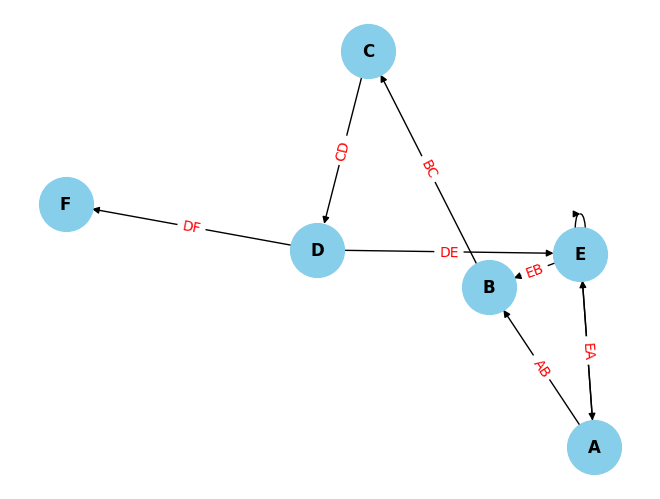

In [ ]:
vertices = ['A','B','C','D','E','F']
arestas = ['AB','AE','BC','CD','DE','DF','EA','EB','EE']

grafinho = Grafo(vertices, arestas)
grafinho.cria_lista_encadeada()
grafinho.mostra_adjacencias()
grafinho.mostrar_lista_adj()
grafinho.mostrar_lista_encadeada()
grafinho.matriz_adjacente()
grafinho.matriz_incidencias()
grafinho.matriz_incidencias_orientado()
# grafinho.desenhar_grafo()
grafinho.desenhar_grafo_direcionado()

#### Exemplo de Implementação (Saída de Dados)

Exemplo de grafo não direcionado


Lista de Adjacências (como lista comum)
['A', ['E', 'B'], 'B', ['A', 'C', 'E'], 'C', ['B', 'D'], 'D', ['C', 'E', 'F'], 'E', ['E', 'A', 'B', 'D'], 'F', ['D']]

Lista de Adjacências (como lista encadeada)
A → [E, B] → B → [A, C, E] → C → [B, D] → D → [C, E, F] → E → [E, A, B, D] → F → [D]

Lista de Adjacências (como lista visual)
A → E, B
B → A, C, E
C → B, D
D → C, E, F
E → E, A, B, D
F → D

Matriz de Adjacências:
  A B C D E F 
A 0 1 0 0 1 0 
B 1 0 1 0 1 0 
C 0 1 0 1 0 0 
D 0 0 1 0 1 1 
E 1 1 0 1 1 0 
F 0 0 0 1 0 0 

Matriz de Incidências:
  AB AE BC BE CD DE DF EE EA 
A  1  1  0  0  0  0  0  0  1  
B  1  0  1  1  0  0  0  0  0  
C  0  0  1  0  1  0  0  0  0  
D  0  0  0  0  1  1  1  0  0  
E  0  1  0  1  0  1  0  1  1  
F  0  0  0  0  0  0  1  0  0  

Representação do Grafo
Este é um grafo não-direcionado



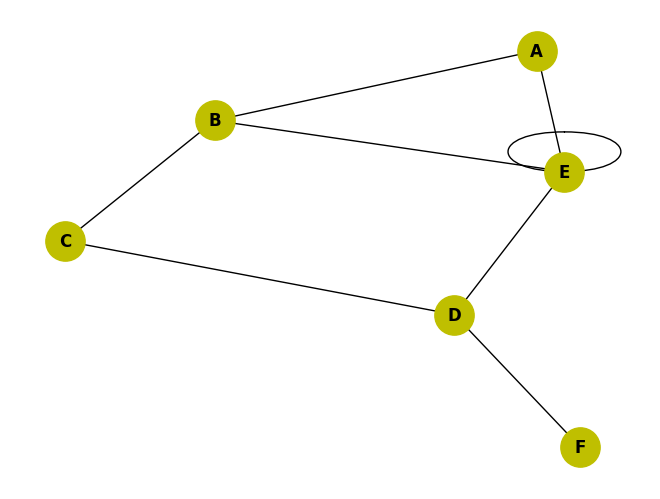

In [ ]:
vertices = ['A','B','C','D','E', 'F']
arestas = ['AB','AE','BC','BE','CD','DE','DF','EE','EA']

grafinho = Grafo(vertices, arestas)
grafinho.cria_lista_encadeada()
grafinho.mostra_adjacencias() # lista de ajdacencias comum
print()
grafinho.mostrar_lista_adj() # lista de adjacencias encadeada
print()
grafinho.mostrar_lista_encadeada() # lista de adjacencias visual
grafinho.matriz_adjacente() # matriz de adjacencias
print()
grafinho.matriz_incidencias() # matriz de incidencias
print()
grafinho.desenhar_grafo() # representação do grafo
print()

Exemplo de Grafo Direcionado


Lista de Adjacências (como lista comum)
['A', ['C', 'B'], 'B', ['A', 'C'], 'C', ['A', 'B', 'D'], 'D', ['C', 'E'], 'E', ['D', 'E']]

Lista de Adjacências (como lista encadeada)
A → [C, B] → B → [A, C] → C → [A, B, D] → D → [C, E] → E → [D, E]

Lista de Adjacências (como lista visual)
A → C, B
B → A, C
C → A, B, D
D → C, E
E → D, E

Matriz de Adjacências:
  A B C D E 
A 0 1 1 0 0 
B 1 0 1 0 0 
C 1 1 0 1 0 
D 0 0 1 0 1 
E 0 0 0 1 1 

Matriz de Incidências:
   AC  AB  BC  CD  DE  EE  
A  -1  -1   0   0   0   0  
B   0  +1  -1   0   0   0  
C  +1   0  +1  -1   0   0  
D   0   0   0  +1  -1   0  
E   0   0   0   0  +1  -1  

Representação do Grafo
Este é um grafo direcionado



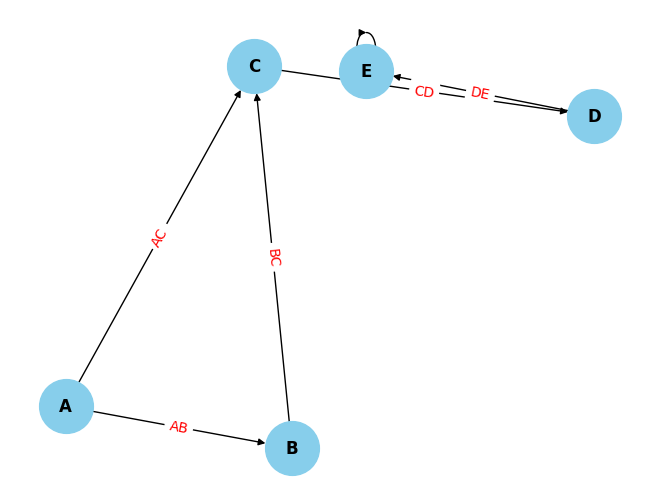

In [ ]:
vertices = ['A','B','C','D','E']
arestas = ['AC','AB','BC','CD','DE','EE']

grafinho = Grafo(vertices, arestas)
grafinho.cria_lista_encadeada()
grafinho.mostra_adjacencias() # lista de ajdacencias comum
print()
grafinho.mostrar_lista_adj() # lista de adjacencias encadeada
print()
grafinho.mostrar_lista_encadeada() # lista de adjacencias visual
grafinho.matriz_adjacente() # matriz de adjacencias
print()
grafinho.matriz_incidencias_orientado() # matriz de incidencias
print()
grafinho.desenhar_grafo_direcionado() # representação do grafo
print()